#**주차 수요 예측**
# 단계3 : 모델링

## 0.미션

* 1) 모델링
    * 4개 이상의 알고리즘을 이용하여 모델 생성
    * 각 모델에 대해 성능 튜닝 수행
    * 성능 평가 및 비교
        * 결과를 데이터프레임으로 정리하여 비교.
        * 성능 비교를 통해 최적의 모델 선정
        * 성능 가이드 
            * MAE : 115~178
            * MAPE : 0.69~1.51


* 2) 파이프라인모델링
    * 함수 생성
        * Input : 새로운 데이터를 입력 받아서 
        * 전처리를 수행한 후
        * 선정된 모델로 예측
        * Output : 예측 결과 

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.

    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [30]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [32]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 불러오기

#### 1) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt 

#### 2) 한글 폰트 설정


In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 3) 함수 생성

* 모델 실제 vs 예측결과 비교 그래프

In [34]:
def model_plot(y, pred) : 
    plt.figure(figsize = (12,8))
    plt.scatter(y, pred, alpha=0.4)

    x_l = np.linspace( y.min(), y.max(), 100)
    plt.plot(x_l, x_l, color = 'black', alpha=0.4)

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid()
    plt.show()

### (3) 데이터 불러오기

* **세부 요구사항**
    - 탐색적 데이터분석 단계에서 저장한 파일을 불러옵니다.

In [35]:
file1 = 'base_data2.pkl'
data = joblib.load(path + file1)

In [36]:
data.shape

(345, 17)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   단지코드         345 non-null    object 
 1   총세대수         345 non-null    int64  
 2   준공연도         345 non-null    int64  
 3   건물형태         339 non-null    object 
 4   난방방식         319 non-null    object 
 5   승강기설치여부      322 non-null    float64
 6   실차량수         345 non-null    int64  
 7   총면적          345 non-null    float64
 8   전용면적_10_30   345 non-null    int64  
 9   전용면적_30_40   345 non-null    int64  
 10  전용면적_40_50   345 non-null    int64  
 11  전용면적_50_60   345 non-null    int64  
 12  전용면적_60_70   345 non-null    int64  
 13  전용면적_70_80   345 non-null    int64  
 14  전용면적_80_200  345 non-null    int64  
 15  임대보증금        345 non-null    float64
 16  임대료          345 non-null    float64
dtypes: float64(4), int64(10), object(3)
memory usage: 48.5+ KB


## 2.모델링

* **세부 요구사항**
    * 모델링을 위한 전처리 : NaN 조치. 데이터 분할, 스케일링, 가변수화 등
    * 4개 이상의 알고리즘을 이용하여 모델 생성
    * 각 모델에 대해 성능 튜닝 수행
        * 선형회귀 : 릿지, 라쏘, 엘라스틱넷 중 1~2개 함께 사용하여 성능 비교
        * 랜덤포레스트 : 기본값으로 모델링 수행
        * 그외 알고리즘 : 그리드서치 튜닝으로 성능 최적화
    * 성능 비교를 통해 최적의 모델 선정
        * 검증 성능 가이드라인 : MAE : 120 내외

### (1) 데이터전처리


* **세부 요구사항**
    * 모델링을 위한 전처리를 수행합니다.
        * x,y 분할(식별자 역할의 단지코드 칼럼 제거하고, x,y로 분할)
        * 단지코드 제거
        * 가변수화
        * 스케일링(필요시)
        * train : validation
            * 적절한 비율 사용하기
            * random_state 지정하기

#### 1) x, y 분할

In [38]:
# x, y 분할
target = '실차량수'

x = data.drop([target, '단지코드'], axis = 1)
y = data.loc[:, target]

#### 2) NaN 조치

In [39]:
data.isna().sum()

단지코드            0
총세대수            0
준공연도            0
건물형태            6
난방방식           26
승강기설치여부        23
실차량수            0
총면적             0
전용면적_10_30      0
전용면적_30_40      0
전용면적_40_50      0
전용면적_50_60      0
전용면적_60_70      0
전용면적_70_80      0
전용면적_80_200     0
임대보증금           0
임대료             0
dtype: int64

In [40]:
# 최빈값으로 적용하기
imputer = SimpleImputer(strategy = 'most_frequent')
x_cols = list(x)
x = imputer.fit_transform(x)

# 필수는 아니지만 관리상 편리를 위해서 데이터프레임으로 변환하기
x = pd.DataFrame(x, columns = x_cols)
x.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,총면적,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_60,전용면적_60_70,전용면적_70_80,전용면적_80_200,임대보증금,임대료
0,78,2013,계단식,개별,1.0,4393.14,0,0,0,78,0,0,0,56962000.0,642930.0
1,35,2013,복도식,개별,1.0,983.22,35,0,0,0,0,0,0,63062000.0,470100.0
2,88,2013,계단식,개별,1.0,5244.69,0,0,0,88,0,0,0,72190000.0,586540.0
3,477,2014,복도식,지역,1.0,34607.34,0,0,0,150,0,216,111,101516666.666667,950305.0
4,15,2013,복도식,개별,1.0,309.5,15,0,0,0,0,0,0,55227500.0,340148.333333


#### 3) 가변수화

In [41]:
cat_cols = ['건물형태', '난방방식']  
x = pd.get_dummies(x, columns = cat_cols)

#### 4) train : val 분할

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

#### 5) 스케일링

In [43]:
# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### (2) 알고리즘1 : 선형회귀

#### 1) 선형회귀

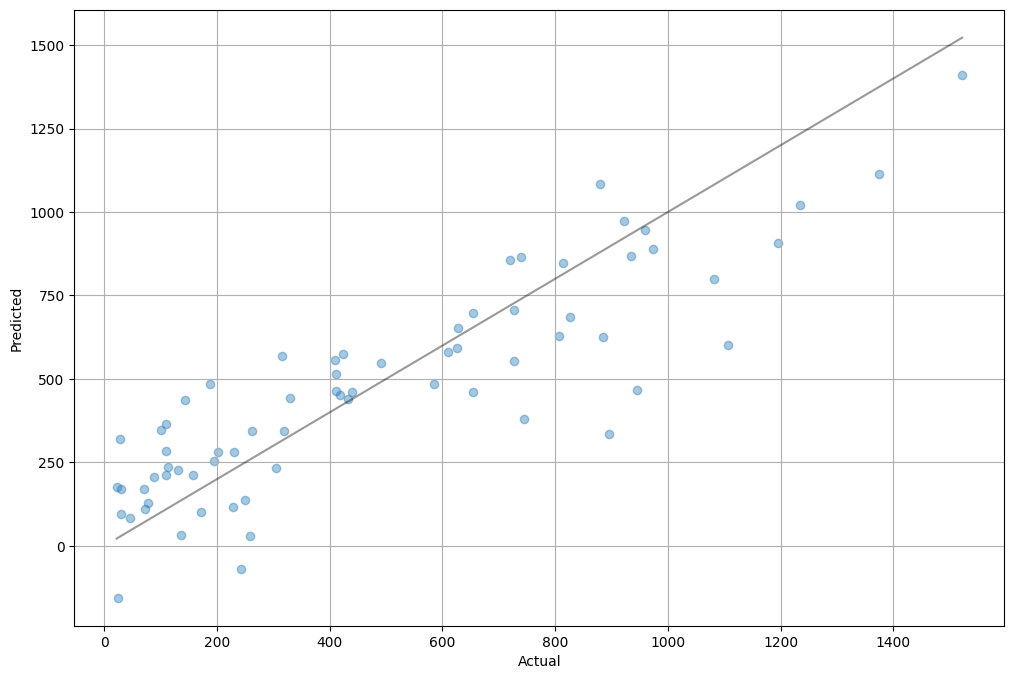

In [44]:
model1_1 = LinearRegression()
model1_1.fit(x_train, y_train)

pred1_1 = model1_1.predict(x_val)

model_plot(y_val, pred1_1)

In [45]:
print(mean_squared_error(y_val, pred1_1, squared = False))
print(mean_absolute_error(y_val, pred1_1))
print(mean_absolute_percentage_error(y_val, pred1_1))

187.69609754942215
145.5329087347736
0.9243237984935073


#### 2) 릿지 회귀

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.26479e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


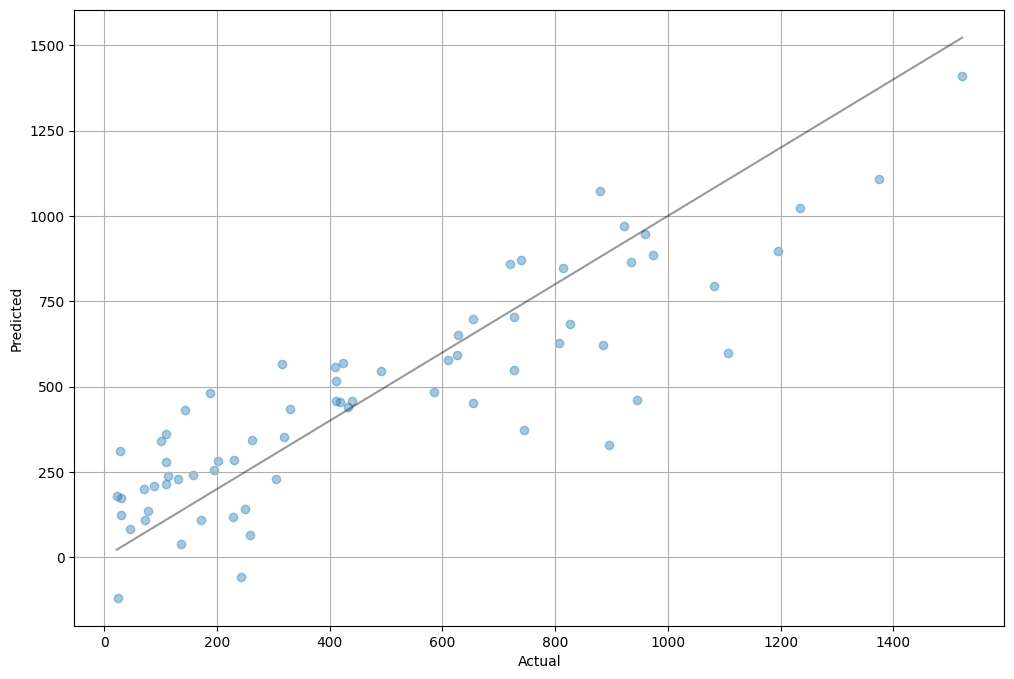

In [46]:
model1_2 = Ridge()
model1_2.fit(x_train, y_train)

pred1_2 = model1_2.predict(x_val)

model_plot(y_val, pred1_2)

In [47]:
print(mean_squared_error(y_val, pred1_2, squared = False))
print(mean_absolute_error(y_val, pred1_2))
print(mean_absolute_percentage_error(y_val, pred1_2))

187.88044568149036
146.15736123439873
0.9219919741543258


#### 3) 라쏘 회귀

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.570e+06, tolerance: 3.791e+03
  model = cd_fast.enet_coordinate_descent(


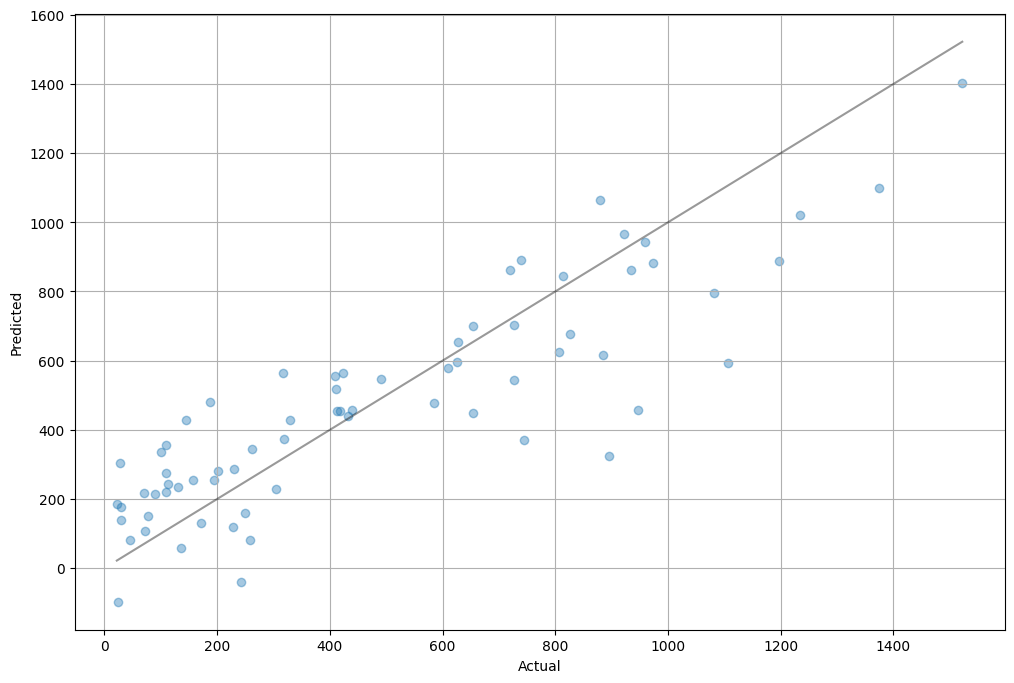

In [48]:
model1_3 = Lasso()
model1_3.fit(x_train, y_train)

pred1_3 = model1_3.predict(x_val)

model_plot(y_val, pred1_3)

In [49]:
print(mean_squared_error(y_val, pred1_3, squared = False))
print(mean_absolute_error(y_val, pred1_3))
print(mean_absolute_percentage_error(y_val, pred1_3))

188.43719488476776
146.85711695915606
0.921497946598832


### (3) 알고리즘2 : KNN

{'metric': 'manhattan', 'n_neighbors': 5}


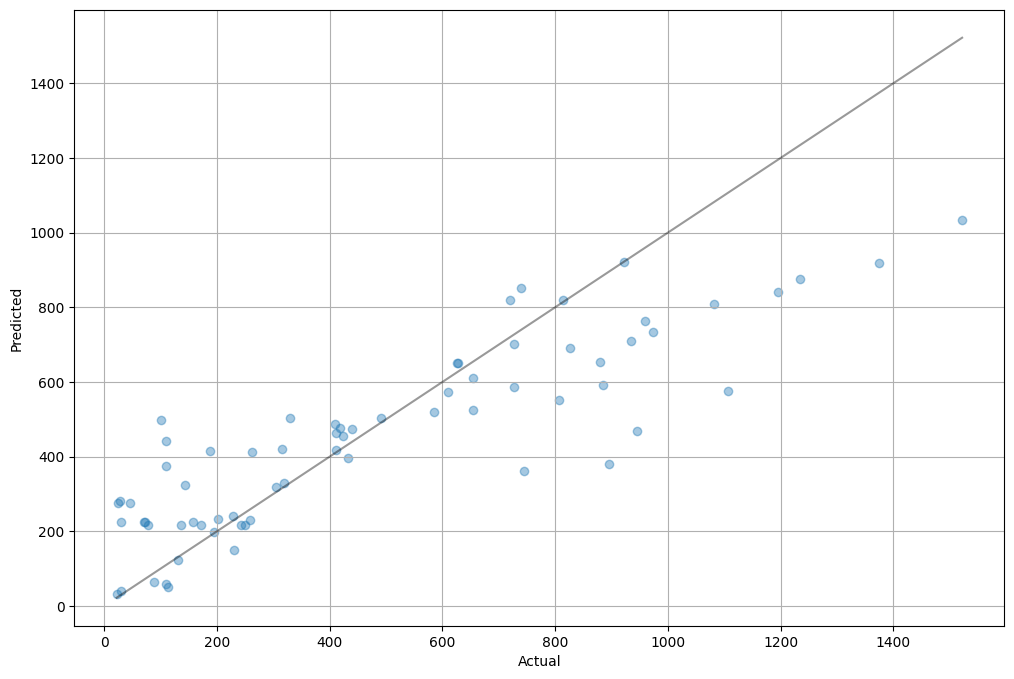

In [50]:
# hyper parameter
params = {'n_neighbors':range(3,50,2), 'metric':['euclidean','manhattan']}

model2 = GridSearchCV(KNeighborsRegressor(), params, cv = 5)

model2.fit(x_train_s, y_train)
print(model2.best_params_)

pred2 = model2.predict(x_val_s)

model_plot(y_val, pred2)

In [51]:
print(mean_squared_error(y_val, pred2, squared = False))
print(mean_absolute_error(y_val, pred2))
print(mean_absolute_percentage_error(y_val, pred2))

206.92368963783082
148.36521739130436
0.9055101724704482


### (4) 알고리즘3 : 랜덤포레스트

{'max_features': 7, 'n_estimators': 140}


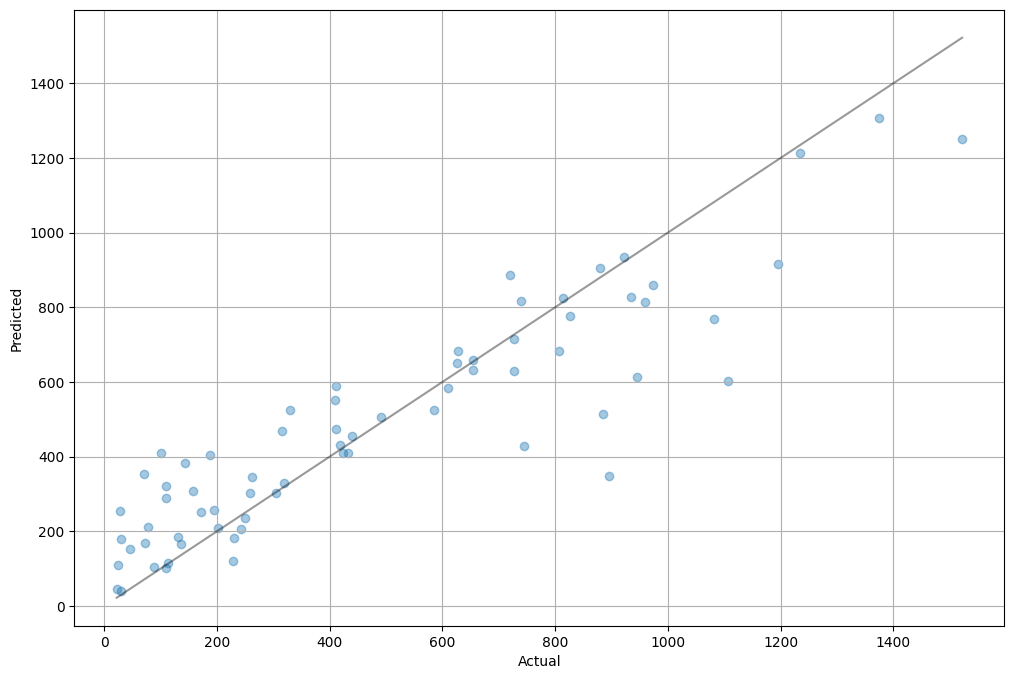

In [52]:
params = {'n_estimators':range(50,151,10), 'max_features':range(5,15)}

model3 = GridSearchCV(RandomForestRegressor(), params, cv = 5)
model3.fit(x_train, y_train)
print(model3.best_params_)

pred3 = model3.predict(x_val)

model_plot(y_val, pred3)

In [53]:
print(model3.best_params_)

{'max_features': 7, 'n_estimators': 140}


In [54]:
print(mean_squared_error(y_val, pred3, squared = False))
print(mean_absolute_error(y_val, pred3))
print(mean_absolute_percentage_error(y_val, pred3))

167.13997160450944
115.88612836438924
0.6945630982167132


### (5) 알고리즘4 : DecisionTreeRegressor

{'max_depth': 2}


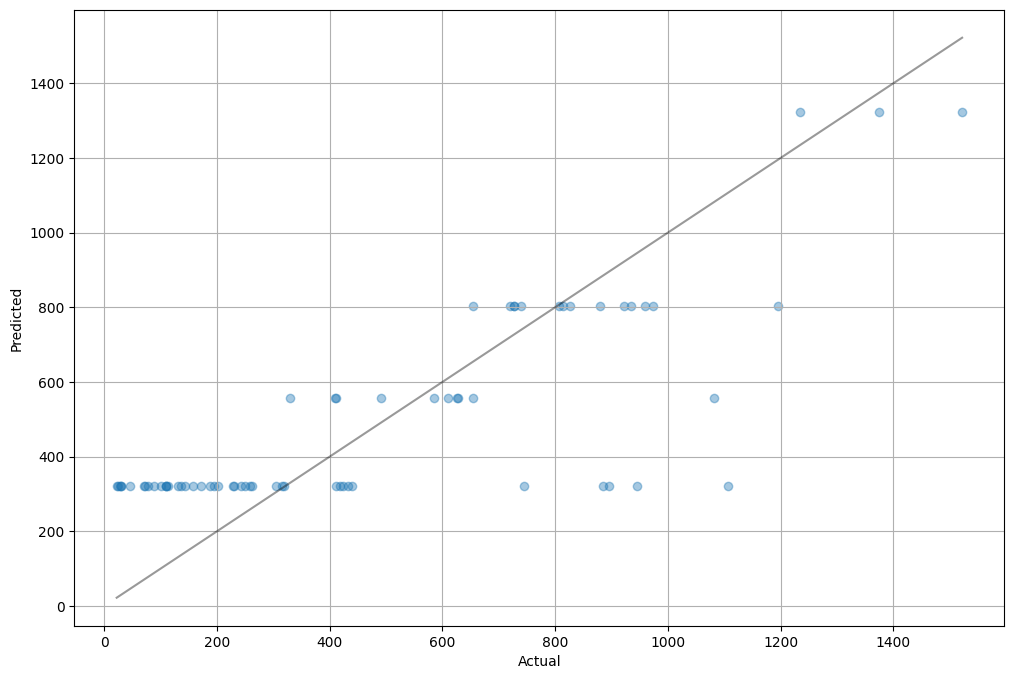

In [55]:
params = {'max_depth':range(1,20)}

model4 = GridSearchCV(DecisionTreeRegressor(), params, cv = 5)
model4.fit(x_train, y_train)

pred4 = model4.predict(x_val)

print(model4.best_params_)

model_plot(y_val, pred4)

In [56]:
print(mean_squared_error(y_val, pred4, squared = False))
print(mean_absolute_error(y_val, pred4))
print(mean_absolute_percentage_error(y_val, pred4))

235.9720629507315
178.7720051893162
1.51511302404323


### (6) 성능결과 비교

* 세부 요구사항
    - 각 모델에 대해서 test 데이터로 성능 측정후, 데이터프레임으로 저장하고 비교한다.

In [57]:
model_no = ['m1_1','m1_2', 'm1_3','m2', 'm3', 'm4']
algorithm = ['LinearRegression','RidgeRegression', 'LassRegression', 'KNN(gs)', 'RF(gs)', 'DT(gs)']
pred = [pred1_1, pred1_2, pred1_3, pred2, pred3, pred4]

result = pd.DataFrame({'model_no':[], 'algorithm':[],'rmse':[],'mae':[],'mape':[]})

for i in range(6) :
    row = [model_no[i], algorithm[i]
           , mean_squared_error(y_val, pred[i], squared = False)
           , mean_absolute_error(y_val, pred[i])
           , mean_absolute_percentage_error(y_val, pred[i])]
    result.loc[i] = row

result

,model_no,algorithm,rmse,mae,mape
0,m1_1,LinearRegression,187.696098,145.532909,0.924324
1,m1_2,RidgeRegression,187.880446,146.157361,0.921992
2,m1_3,LassRegression,188.437195,146.857117,0.921498
3,m2,KNN(gs),206.923690,148.365217,0.905510
4,m3,RF(gs),167.139972,115.886128,0.694563
5,m4,DT(gs),235.972063,178.772005,1.515113


In [58]:
joblib.dump(model3, path + 'model.pkl' )

['/content/drive/MyDrive/project/model.pkl']

## 3.파이프라인 구축

* **세부요구사항**
    * new data : data02_test.csv 를 읽어서 저장
    * 파이프라인 함수를 생성
        * data pipeline 함수
        * ML pipeline 함수

### (1) New Data 불러오기
* **세부요구사항**
    * test.xlsx 를 읽어서 new_data 이름으로 저장
    * 해당 데이터는 최초 데이터와 동일한 구조입니다. 이 데이터를 이용하여 전처리와 예측을 수행해야 합니다.

In [59]:
new_data = pd.read_excel(path + 'test.xlsx')
new_data.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공급면적(공용),임대보증금,임대료,실차량수
0,C0005,서울석촌 도시형주택(공임10년),20,6,서울,20121115.0,복도식,개별가스난방,전체동 설치,9,17.53,11.7251,50449000,263710,21
1,C0005,서울석촌 도시형주택(공임10년),20,10,서울,20121115.0,복도식,개별가스난방,전체동 설치,9,24.71,16.5275,52743000,321040,21
2,C0005,서울석촌 도시형주택(공임10년),20,4,서울,20121115.0,복도식,개별가스난방,전체동 설치,9,26.72,17.8720,53890000,332510,21
3,C0017,대구혁신센텀힐즈,822,228,대구경북,20180221.0,계단식,지역난방,NaN,824,51.87,20.9266,29298000,411200,797
4,C0017,대구혁신센텀힐즈,822,56,대구경북,20180221.0,계단식,지역난방,NaN,824,59.85,24.1461,38550000,462600,797


### (2) 데이터 파이프라인 구축
* **세부요구사항**
    * data pipeline 함수를 생성합니다.
        * 입력 : new_data
        * 처리 : 
            * 1.데이터전처리, 2.탐색적 데이터분석 단계에서 수행했던 전처리 코드들을 순차적으로 처리합니다.
            * 모델링을 위한 전처리 : Target 제거, NaN조치, 가변수화, (스케일링) 등을 수행합니다.
        * 출력 : 전처리 완료된 데이터 프레임
    

In [60]:
def data_pipeline(data, imputer, scaler ):

    data0 = data.copy()

    # 준공연도 NaN 조치
    data0['준공연도'] = data0['준공일자'].astype('str').str.slice(0, 4)
    data0.loc[data0['준공연도'].isin(['nan', '1900','1111']), '준공연도'] = '1992'
    data0['준공연도'] = data0['준공연도'].astype('int')

    # 불필요한 변수 제거.
    vars = ['단지내주차면수', '단지명', '준공일자','지역','실차량수']
    data0.drop(vars, axis = 1, inplace = True)

    # dataset 두개로 나누기
    vars = ['단지코드', '총세대수', '준공연도', '건물형태', '난방방식', '승강기설치여부']
    data01 = data0[vars].copy()
    data01 = data01.drop_duplicates()

    vars2 = ['단지코드', '전용면적별세대수','전용면적', '공급면적(공용)','임대보증금','임대료']
    data02 = data0[vars2].copy()

    # 전용면적을 구간으로 나누기
    temp = data02.loc[: , ['단지코드','전용면적','전용면적별세대수']]
    temp['전용면적_cut'] = pd.cut(temp['전용면적'], bins = [10,30,40,50,60,70, 80, 200]
                            , labels = ['전용면적_10_30','전용면적_30_40','전용면적_40_50','전용면적_50_60','전용면적_60_70','전용면적_70_80', '전용면적_80_200'])

    temp2 = temp.groupby(['단지코드', '전용면적_cut'], as_index = False)['전용면적별세대수'].sum()
    temp3 = temp2.pivot(index='단지코드', columns='전용면적_cut', values='전용면적별세대수')
    temp3.reset_index(inplace = True)

    # 임대보증금, 임대료 집계 하기(평균)
    temp4 = data02.groupby('단지코드', as_index = False)[['임대보증금','임대료']].mean()

    # 단지별 총 면적
    data02['총면적'] = data02['전용면적'] * data02['전용면적별세대수']
    temp6 = data02.groupby(['단지코드'], as_index = False)['총면적'].sum()

    # 합치기기
    base_data = pd.merge(data01,temp6, how = 'left', on = '단지코드')
    base_data = pd.merge(base_data,temp3, how = 'left', on = '단지코드')
    base_data = pd.merge(base_data,temp4, how = 'left', on = '단지코드')

    base_data.drop('단지코드', axis = 1, inplace = True)

    # 난방방식 : 중앙, 지역, 개별 세가지로 묶기
    base_data['난방방식'] = base_data['난방방식'].map({'개별가스난방':'개별', '지역난방':'지역', '지역가스난방':'지역', 
                                            '중앙가스난방':'중앙', '개별유류난방':'개별', '중앙난방':'중앙',
                                            '지역유류난방':'지역', '중앙유류난방':'중앙'})

    # 난방방식 : 중앙, 지역, 개별 세가지로 묶기
    base_data['승강기설치여부'] = base_data['승강기설치여부'].map({'전체동 설치':1, '일부동 설치':0, '미설치':0})

    # 모델링을 위한 전처리 ----------------------------------------------------
    # target 삭제는 위 삭제 단계에 포함
    # NaN 조치
    x_cols = list(base_data)
    base_data = imputer.transform(base_data)
    base_data = pd.DataFrame(base_data, columns = x_cols)

    # 가변수화
    cat_cols = ['건물형태', '난방방식']  
    base_data = pd.get_dummies(base_data, columns = cat_cols)

    # 스케일링 (생략)

    return base_data


In [61]:
data = data_pipeline(new_data, imputer, scaler)
data.head()

,총세대수,준공연도,승강기설치여부,총면적,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_60,전용면적_60_70,전용면적_70_80,전용면적_80_200,임대보증금,임대료,건물형태_계단식,건물형태_복도식,건물형태_혼합식,난방방식_개별,난방방식_중앙,난방방식_지역
0,20,2012,1.0,459.16,20,0,0,0,0,0,0,52360666.666667,305753.333333,0,1,0,1,0,0
1,822,2018,1.0,22370.76,0,0,0,404,0,0,0,35466000.0,445466.666667,1,0,0,0,0,1
2,112,2014,1.0,9313.76,0,0,0,0,0,20,92,98697500.0,744450.0,1,0,0,0,0,1
3,122,2011,1.0,10129.82,0,0,0,0,0,22,100,0.0,0.0,1,0,0,0,0,1
4,262,2011,1.0,21351.67,0,0,0,0,0,77,185,0.0,0.0,1,0,0,0,0,1


### (3) test
* **세부요구사항**
    * new_data로 부터, 전처리 및 예측 결과를 출력해 봅시다.

In [62]:
data = data_pipeline(new_data, imputer, scaler)
model3.predict(data)

array([ 101.09285714,  686.52142857,  603.85      ,  628.22142857,
        604.82142857,  347.77857143,  453.12857143,  595.35714286,
        706.55714286,  507.45714286,  270.73571429,  103.5       ,
       1350.97857143,  644.51428571,  594.37857143,  733.05      ,
        608.76428571,  193.40714286,  964.66428571,  965.13571429,
        301.3       ,  792.52142857,  763.57142857,  805.25      ,
        903.42857143,  358.29285714,   75.20714286,  973.20714286,
        301.7       ,  612.88571429])